In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Tarefa: Avaliar a qualidade das espécies de semente e determinar as melhores.

In [2]:
raw_data = pd.read_excel("data.xlsx", index_col="Especie")

In [3]:
raw_data = raw_data.fillna(0)
raw_data.head(10)

,Situacao,Quantidade_plantada_cm2,Peso_Saca_kg,Distancia_Semeadura_mm,Quantidade_nao_germinada,Ocorrencia_chuva_periodo,Ocorrencia_insetos_planta,Geada,Adubo_gramas_cm2
Especie,,,,,,,,,
Semente574,0,199,590,6.00,8.0,39,14.3,1,15.0
Semente444,1,14,6684,3.85,1.0,30,10.7,0,51.0
Semente202,1,173,7102,10.95,8.0,36,4.7,1,41.0
Semente853,0,138,2724,6.00,12.0,15,5.5,0,0.0
Semente665,0,47,4814,8.65,3.0,7,13.5,0,0.0
Semente953,0,67,8488,9.55,2.0,4,0.7,1,3.0
Semente976,1,112,5584,2.95,2.0,17,13.5,0,49.0
Semente752,1,198,7828,11.05,4.0,22,11.5,1,24.0
Semente168,1,62,1184,1.90,10.0,8,6.3,0,7.0


In [4]:
print('Quantidade de amostras: ', raw_data.shape[0])

Quantidade de amostras:  79


In [5]:
raw_data.describe()

,Situacao,Quantidade_plantada_cm2,Peso_Saca_kg,Distancia_Semeadura_mm,Quantidade_nao_germinada,Ocorrencia_chuva_periodo,Ocorrencia_insetos_planta,Geada,Adubo_gramas_cm2
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,0.481013,102.367089,5686.759494,6.058228,5.822785,25.037975,8.487342,0.544304,23.620253
std,0.502832,62.428662,3451.372010,3.752054,3.905156,14.437703,4.553876,0.501216,17.545036
min,0.000000,1.000000,282.000000,0.350000,0.000000,1.000000,0.300000,0.000000,0.000000
25%,0.000000,46.500000,2339.000000,2.650000,2.000000,14.000000,4.900000,0.000000,7.000000
50%,0.000000,112.000000,6398.000000,6.000000,5.000000,22.000000,8.700000,1.000000,23.000000
75%,1.000000,155.000000,8499.000000,9.525000,9.000000,38.000000,12.700000,1.000000,40.500000
max,1.000000,199.000000,10996.000000,11.900000,12.000000,50.000000,15.500000,1.000000,53.000000


Analisando os dados apresentados, verifica-se a presença de 9 variáveis:

- 'Situacao'
- 'Quantidade_plantada_cm2'
- 'Peso_Saca_kg'
- 'Distancia_Semeadura_mm'
- 'Quantidade_nao_germinada'
- 'Ocorrencia_chuva_periodo'
- 'Ocorrencia_insetos_planta'
- 'Geada'
- 'Adubo_gramas_cm2'

Acredito que para determinar as melhores espécies de sementes será necessário identificar as que tem melhor desempenho em meio à escassez e adversidades apresentadas. Como por exemplo: maior produtividade em meio a geada, menor utilização de adubos e água, maior incidência de insetos, etc.

Como uma medida de desempenho poderemos utilizar a variável Peso_Saca_kg, a qual representa a produtividade total em quilogramas. 

Contudo, como a quantidade plantada varia muito como podemos notar na variável Quantidade_plantada_cm2, será necessário converter para produtividade por unidade plantada (cm2) (Peso_Saca_kg/Quantidade_plantada_cm2) como outra medida de desempenho.



### Plotagem das distribuições dos valores

In [6]:
df = raw_data.copy()

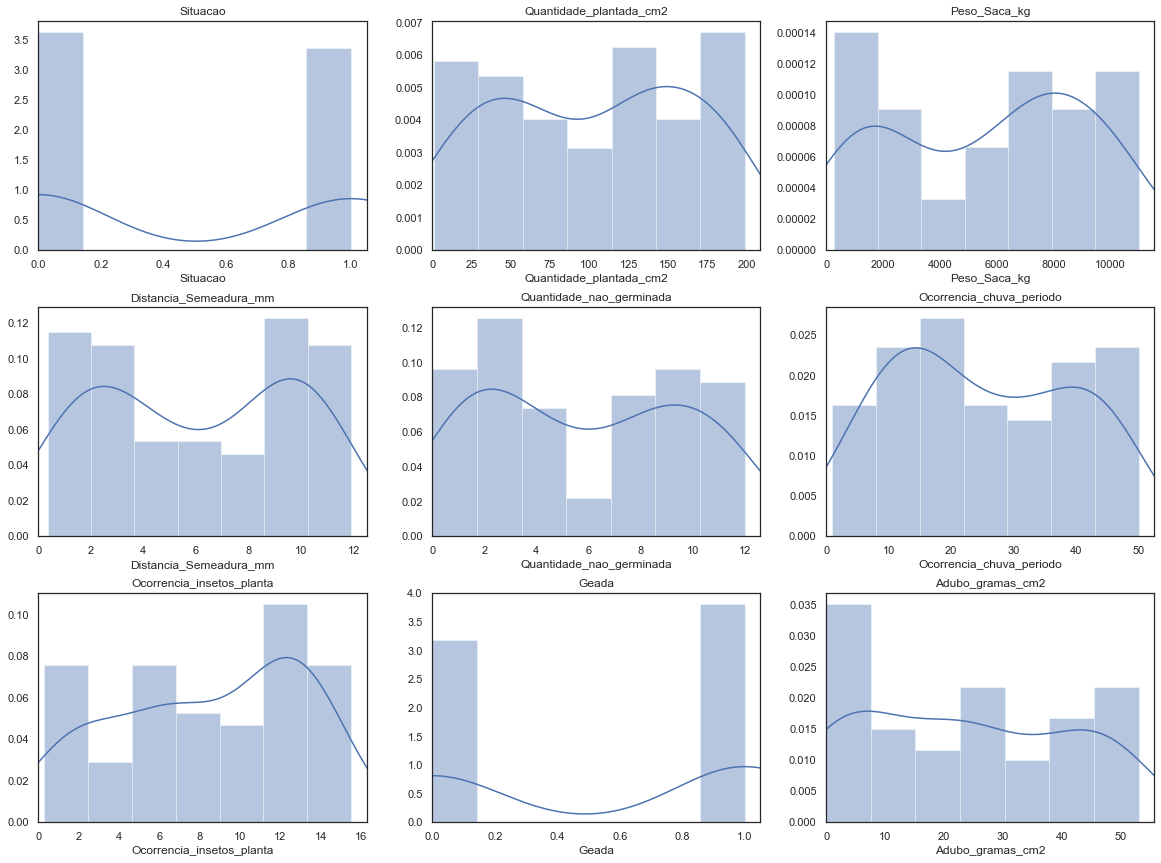

In [79]:
n = df.shape[0] #quantidade de observações 
k = int(1 + 3.322 * np.log10(n)) #número de classes

plt.figure(figsize=(20, 20))
for i, feature in enumerate(df.columns):
    plt.subplot(4, 3, i + 1)
    plt.subplots_adjust(wspace = 0.2, hspace = 0.25)
    plt.xlim((0,df[feature].max()*1.05) )
    sns.distplot(df[feature], bins=k,)
    plt.title(feature)

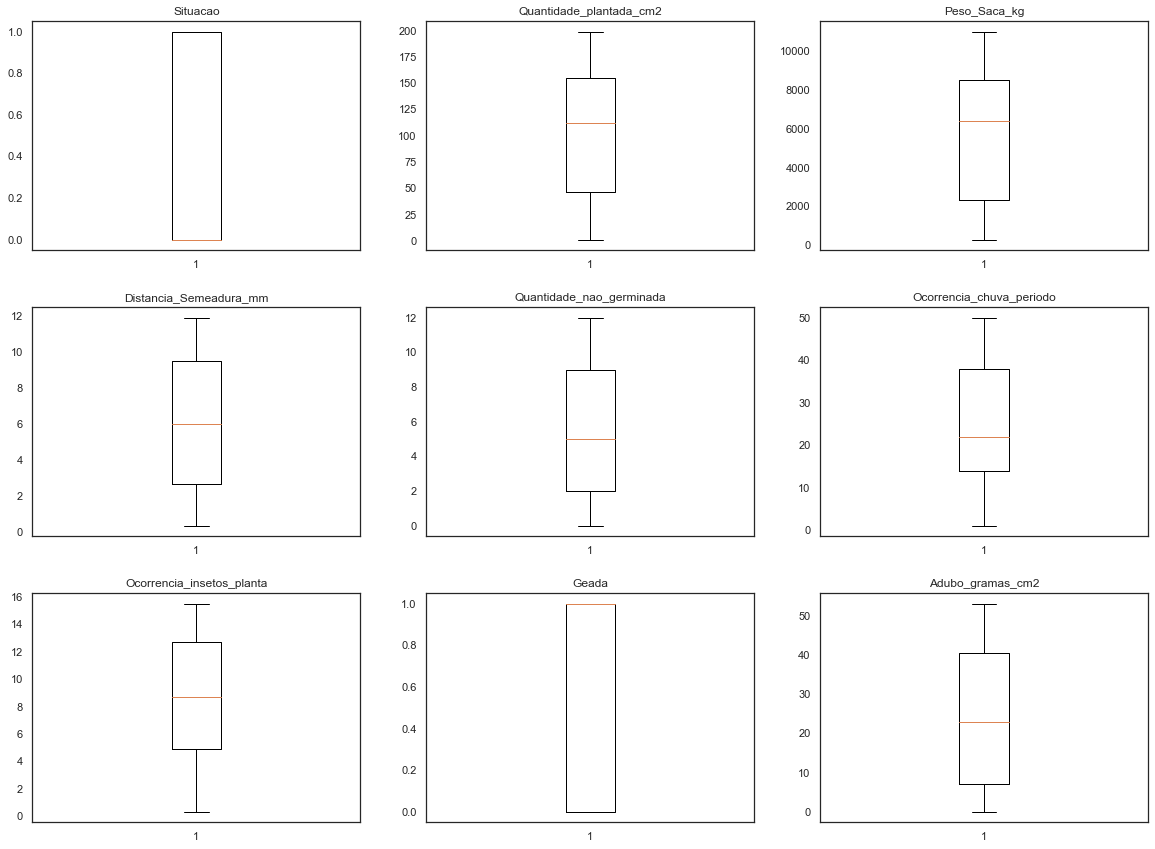

In [88]:
plt.figure(figsize=(20, 20))
for i, feature in enumerate(df.columns):
    plt.subplot(4, 3, i + 1)
    plt.subplots_adjust(wspace = 0.2, hspace = 0.25)
    plt.boxplot(df[feature])
    plt.title(feature)

In [ ]:
sns.boxplot()

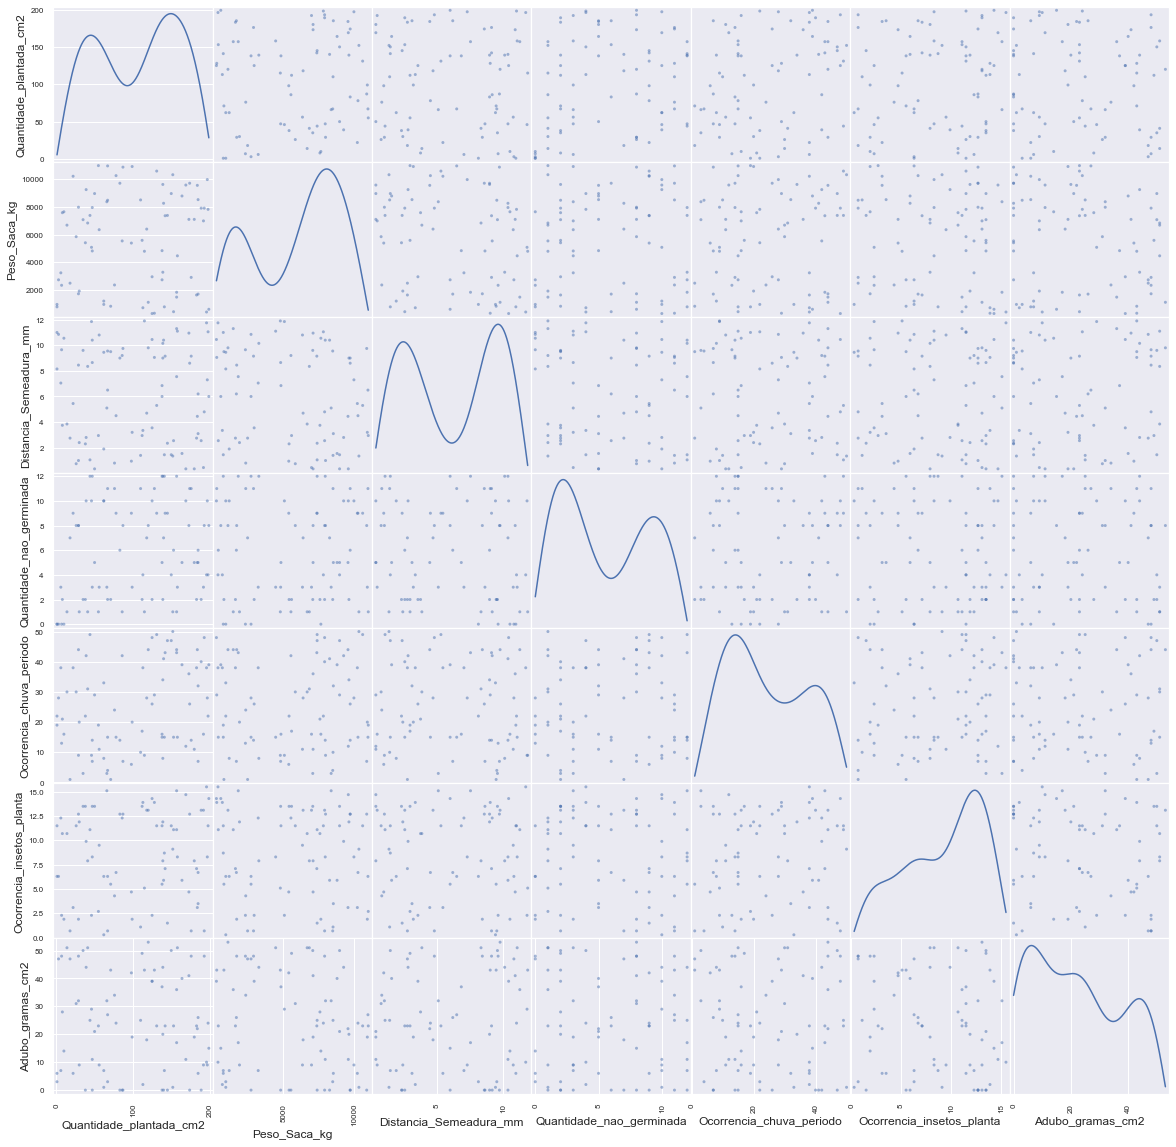

In [9]:
pd.plotting.scatter_matrix(df.drop(['Situacao', 'Geada'], axis=1),figsize = (20,20), diagonal = 'kde')
plt.show()

In [10]:
def corrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(10, 10))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(10, 250, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, vmin = -1, vmax = 1, mask=mask, cmap=cmap, annot = True, 
                square=True, linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, vmin = -1, vmax = 1, cmap=cmap, square=True, annot = True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)

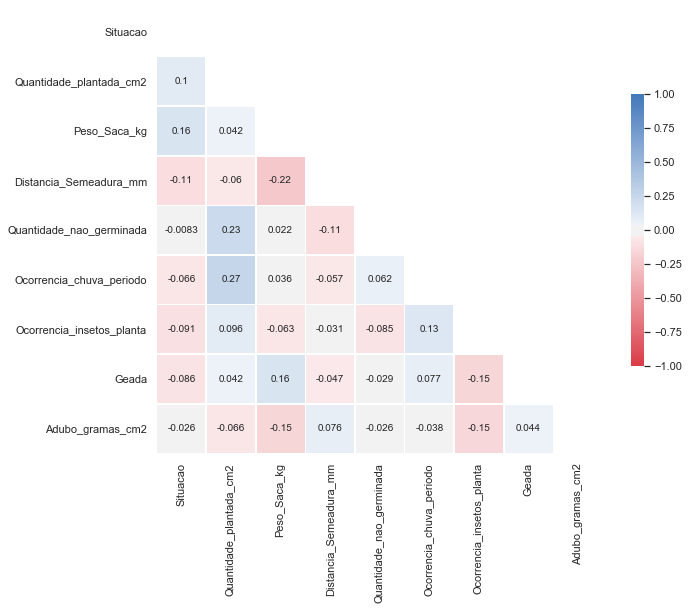

In [11]:
corrMtx(df)

#### Considerações

- Após a plotagem de alguns gráficos (histograma de distribuição, boxplot, scatterplot e matrix de correlação). Não foi possível identificar algum padrão muito evidente visualmente falando.

- Nenhuma das variáveis apresenta valores muito discrepantes - outliers - em relação às medidas de tendências centrais. (vide bloxplot sem pontos fora dos extremos)

- As variáveis não apresentam fortes correlações entre si.

- A maioria das variáveis apresentam concentrações de valores nos extremos formando o padrão M na linha KDE (Kernel density estimation)

## Modelagem

Como não temos dados suficientes e nem repetições de espécies para trabalharmos com aprendizado supervisionado, adotei dois caminhos na tarefa.

O primeiro consistiu em trabalhar com a média da produtividade e analisar o impacto da proporção das outra variáveis sobre ela. 
Realizei diversos testes com criação de novas features e trabalhando a escala dos valores. Contudo, serviram apenas para trazer alguns *insights* sobre os dados que, ao final, acabaram convergerndo ao resultado definitivo obtido a seguir. A parte experimental foi omitida neste notebook final.

O segundo caminho resolvi trabalhar com Unsupervised Learning, mais precisamente PCA em combinação com Clustering KMeans.

O objetivo primário seria buscar agrupamentos padronizados nos dados, os quais são difíceis de perceber em grandes dimensões.

Deste modo, criei uma instância de PCA com 2 componentes para analisar em duas dimensões usando um simples Scatter Plot.

O resultado obtido foi 4 grupos perfeitamente desenhados.

Vejamos:

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [13]:
pca = PCA(2)
scaler = MinMaxScaler()

In [92]:
data = raw_data.copy()

data['produtividade_cm2'] = data.Peso_Saca_kg / data.Quantidade_plantada_cm2

#Transformação dos valores para o intervalo entre 0 e 1
scaled_data = scaler.fit_transform(data)

#Tranformação dos dados para 2 dimensões
pca.fit(scaled_data)
reduced_data = pca.transform(scaled_data)

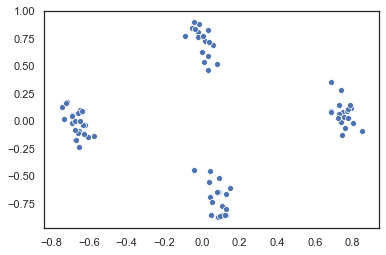

In [93]:
sns.scatterplot(x=reduced_data[:,0], y=reduced_data[:,1])
plt.show()

Para determinar quais amostras pertecem a cada um dos clusters escolhi o algorítmo KMeans para a tarefa.

Após isso, demonstro os clusters novamente, mas com uma melhor visualização e delimitação.

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [17]:
#Determinação da quantidade ideal de clusters nos dados.
list_of_k = [2,3,4,5,6,7,8,9,10]
for k in list_of_k:
    clusterer = KMeans(n_clusters=k, random_state=42, n_init=100, max_iter=1000, n_jobs=-1).fit(reduced_data)
    preds = clusterer.predict(reduced_data)
    silhouette = silhouette_score(reduced_data, preds)
    print("Silhouette Score with k = {}: {:.4}".format(k, silhouette))

Silhouette Score with k = 2: 0.5153
Silhouette Score with k = 3: 0.6473
Silhouette Score with k = 4: 0.8323
Silhouette Score with k = 5: 0.7691
Silhouette Score with k = 6: 0.6733
Silhouette Score with k = 7: 0.6149
Silhouette Score with k = 8: 0.5593
Silhouette Score with k = 9: 0.5374
Silhouette Score with k = 10: 0.5419



- Com o maior valor de Silhouette Score em k = 4, confirma-se o número ideal de clusters com os visualmente detectados (4).  

In [18]:
#Criação do modelo de KMeans com 
kmeans = KMeans(n_clusters = 4, n_init=100, max_iter=1000, n_jobs=-1, random_state=42)
kmeans.fit(reduced_data)

#Classificação das amostras
preds = kmeans.predict(reduced_data)

#Captura dos centróides
centers = kmeans.cluster_centers_

#Revertendo os dados para um Dataframe novamente
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [19]:
import matplotlib.cm as cm
def cluster_results(reduced_data, preds, centers):
	'''
	Visualizes the PCA-reduced cluster data in two dimensions
	Adds cues for cluster centers and student-selected sample data
	'''

	predictions = pd.DataFrame(preds, columns = ['Cluster'])
	plot_data = pd.concat([predictions, reduced_data], axis = 1)

	# Generate the cluster plot
	fig, ax = plt.subplots(figsize = (14,8))

	# Color map
	cmap = cm.get_cmap('gist_rainbow')

	# Color the points based on assigned cluster
	for i, cluster in plot_data.groupby('Cluster'):   
	    cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
	                 color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);

	# Plot centers with indicators
	for i, c in enumerate(centers):
	    ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
	               alpha = 1, linewidth = 2, marker = 'o', s=200);
	    ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);

	# Set plot title
	ax.set_title("Cluster Learning on PCA-Reduced Data - Centroids Marked by Number");

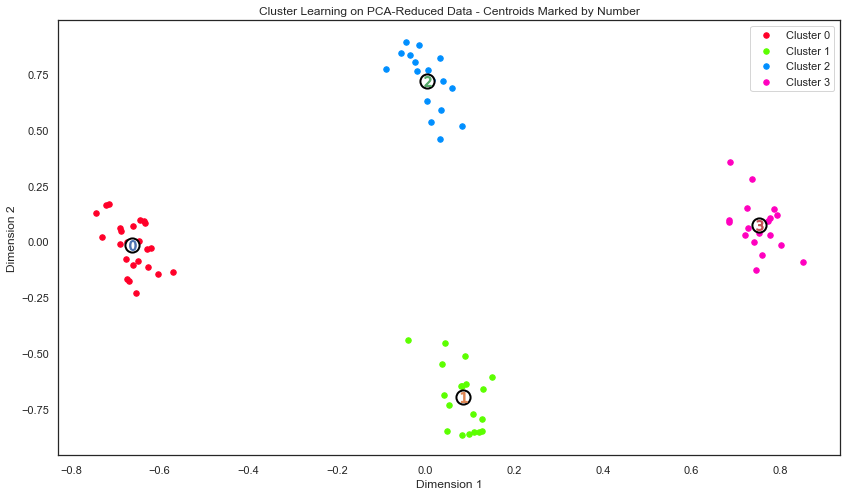

In [20]:
cluster_results(reduced_data, preds, centers)

## Análise Final

In [21]:
#criação do dataframe final
final_data = raw_data.copy()

#adição do grupo de cada amostra
final_data['cluster'] = preds

#adição da feature que representa a produtividade por cm2 de cada amostra
final_data['produtividade_cm2'] = final_data.Peso_Saca_kg / final_data.Quantidade_plantada_cm2

In [22]:
#Cluster 0
cluster_0 = final_data[final_data.cluster == 0]
cluster_0

,Situacao,Quantidade_plantada_cm2,Peso_Saca_kg,Distancia_Semeadura_mm,Quantidade_nao_germinada,Ocorrencia_chuva_periodo,Ocorrencia_insetos_planta,Geada,Adubo_gramas_cm2,cluster,produtividade_cm2
Especie,,,,,,,,,,,
Semente574,0,199,590,6.00,8.0,39,14.3,1,15.0,0,2.964824
Semente953,0,67,8488,9.55,2.0,4,0.7,1,3.0,0,126.686567
Semente375,0,158,4462,11.10,3.0,15,8.3,1,51.0,0,28.240506
Semente748,0,30,1910,2.40,1.0,20,11.9,1,9.0,0,63.666667
Semente387,0,44,7388,1.05,12.0,49,11.1,1,25.0,0,167.909091
Semente493,0,189,7916,2.55,2.0,40,13.1,1,0.0,0,41.883598
Semente334,0,98,5386,0.95,9.0,6,4.7,1,42.0,0,54.959184
Semente375,0,22,10226,5.45,9.0,38,3.1,1,6.0,0,464.818182
Semente880,0,41,6838,8.35,1.0,31,7.9,1,51.0,0,166.780488


In [23]:
#Cluster 1
cluster_1 = final_data[final_data.cluster == 1]
cluster_1

,Situacao,Quantidade_plantada_cm2,Peso_Saca_kg,Distancia_Semeadura_mm,Quantidade_nao_germinada,Ocorrencia_chuva_periodo,Ocorrencia_insetos_planta,Geada,Adubo_gramas_cm2,cluster,produtividade_cm2
Especie,,,,,,,,,,,
Semente202,1,173,7102,10.95,8.0,36,4.7,1,41.0,1,41.052023
Semente752,1,198,7828,11.05,4.0,22,11.5,1,24.0,1,39.535354
Semente391,1,193,7916,4.80,8.0,48,0.7,1,48.0,1,41.015544
Semente322,1,184,9566,4.45,5.0,44,3.1,1,22.0,1,51.989130
Semente760,1,71,810,9.50,2.0,1,5.5,1,43.0,1,11.408451
Semente982,1,141,766,1.45,12.0,15,8.7,1,7.0,1,5.432624
Semente403,1,78,10270,4.50,9.0,15,6.7,1,24.0,1,131.666667
Semente292,1,183,1624,2.75,2.0,38,7.1,1,23.0,1,8.874317
Semente355,1,152,10336,1.35,1.0,50,9.1,1,1.0,1,68.000000


In [24]:
#Cluster 2
cluster_2 = final_data[final_data.cluster == 2]
cluster_2

,Situacao,Quantidade_plantada_cm2,Peso_Saca_kg,Distancia_Semeadura_mm,Quantidade_nao_germinada,Ocorrencia_chuva_periodo,Ocorrencia_insetos_planta,Geada,Adubo_gramas_cm2,cluster,produtividade_cm2
Especie,,,,,,,,,,,
Semente853,0,138,2724,6.00,12.0,15,5.5,0,0.0,2,19.739130
Semente665,0,47,4814,8.65,3.0,7,13.5,0,0.0,2,102.425532
Semente991,0,50,8972,0.35,5.0,29,13.5,0,21.0,2,179.440000
Semente713,0,139,9632,9.00,2.0,34,11.9,0,20.0,2,69.294964
Semente357,0,138,4836,6.85,5.0,16,11.5,0,37.0,2,35.043478
Semente409,0,157,1470,11.30,1.0,44,11.1,0,36.0,2,9.363057
Semente645,0,128,304,9.05,11.0,29,13.9,0,43.0,2,2.375000
Semente743,0,180,7102,0.35,5.0,11,7.9,0,19.0,2,39.455556
Semente837,0,125,282,10.45,10.0,48,14.3,0,39.0,2,2.256000


In [25]:
#Cluster 3
cluster_3 = final_data[final_data.cluster == 3]
cluster_3

,Situacao,Quantidade_plantada_cm2,Peso_Saca_kg,Distancia_Semeadura_mm,Quantidade_nao_germinada,Ocorrencia_chuva_periodo,Ocorrencia_insetos_planta,Geada,Adubo_gramas_cm2,cluster,produtividade_cm2
Especie,,,,,,,,,,,
Semente444,1,14,6684,3.85,1.0,30,10.7,0,51.0,3,477.428571
Semente976,1,112,5584,2.95,2.0,17,13.5,0,49.0,3,49.857143
Semente168,1,62,1184,1.90,10.0,8,6.3,0,7.0,3,19.096774
Semente125,1,174,9720,8.60,11.0,26,12.7,0,0.0,3,55.862069
Semente663,1,140,8268,10.40,7.0,41,5.9,0,0.0,3,59.057143
Semente319,1,66,8378,5.10,3.0,3,15.1,0,32.0,3,126.939394
Semente605,1,196,392,11.75,4.0,38,15.5,0,10.0,3,2.000000
Semente421,1,86,5540,9.20,1.0,42,12.3,0,0.0,3,64.418605
Semente926,1,169,9588,0.35,10.0,12,14.7,0,11.0,3,56.733728


#### Considerações:

Nota-se claramente que os dados foram classificados entre grupos que sofreram geada e estão na Situação 0 e 1 (clusters 0 e 1) e aquelas que não sofreram geada e estão na Situação 0 e 1 (clusters 2 e 3).

### Estatística descritiva

In [26]:
#Métricas Gerais
ed_geral = final_data.describe()
media_geral = ed_geral.loc['mean']
mediana_geral = ed_geral.loc['50%']
ed_geral

,Situacao,Quantidade_plantada_cm2,Peso_Saca_kg,Distancia_Semeadura_mm,Quantidade_nao_germinada,Ocorrencia_chuva_periodo,Ocorrencia_insetos_planta,Geada,Adubo_gramas_cm2,cluster,produtividade_cm2
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,0.481013,102.367089,5686.759494,6.058228,5.822785,25.037975,8.487342,0.544304,23.620253,1.392405,142.136739
std,0.502832,62.428662,3451.372010,3.752054,3.905156,14.437703,4.553876,0.501216,17.545036,1.159329,217.599459
min,0.000000,1.000000,282.000000,0.350000,0.000000,1.000000,0.300000,0.000000,0.000000,0.000000,2.000000
25%,0.000000,46.500000,2339.000000,2.650000,2.000000,14.000000,4.900000,0.000000,7.000000,0.000000,29.580779
50%,0.000000,112.000000,6398.000000,6.000000,5.000000,22.000000,8.700000,1.000000,23.000000,1.000000,56.733728
75%,1.000000,155.000000,8499.000000,9.525000,9.000000,38.000000,12.700000,1.000000,40.500000,2.000000,140.102339
max,1.000000,199.000000,10996.000000,11.900000,12.000000,50.000000,15.500000,1.000000,53.000000,3.000000,948.250000


In [27]:
#Cluster 0
ed_cluster_0 = cluster_0.describe()
media_c0 = ed_cluster_0.loc['mean']
mediana_c0 = ed_cluster_0.loc['50%']
ed_cluster_0

,Situacao,Quantidade_plantada_cm2,Peso_Saca_kg,Distancia_Semeadura_mm,Quantidade_nao_germinada,Ocorrencia_chuva_periodo,Ocorrencia_insetos_planta,Geada,Adubo_gramas_cm2,cluster,produtividade_cm2
count,24.0,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.0,24.000000,24.0,24.000000
mean,0.0,88.041667,5665.583333,6.008333,5.291667,25.083333,8.566667,1.0,23.833333,0.0,177.509621
std,0.0,64.488947,3098.497419,3.861056,3.723943,15.024376,4.444309,0.0,19.230109,0.0,258.647601
min,0.0,1.000000,590.000000,0.450000,0.000000,1.000000,0.700000,1.0,0.000000,0.0,2.964824
25%,0.0,38.250000,2443.500000,2.512500,2.000000,13.750000,5.600000,1.0,8.250000,0.0,49.375829
50%,0.0,75.000000,6618.000000,5.725000,4.500000,21.500000,8.900000,1.0,20.500000,0.0,87.028986
75%,0.0,144.000000,7927.000000,9.575000,8.250000,39.000000,12.800000,1.0,43.250000,0.0,167.062639
max,0.0,199.000000,10226.000000,11.850000,12.000000,49.000000,14.300000,1.0,53.000000,0.0,948.250000


In [28]:
#Cluster 1
ed_cluster_1 = cluster_1.describe()
media_c1 = ed_cluster_1.loc['mean']
mediana_c1 = ed_cluster_1.loc['50%']
ed_cluster_1

,Situacao,Quantidade_plantada_cm2,Peso_Saca_kg,Distancia_Semeadura_mm,Quantidade_nao_germinada,Ocorrencia_chuva_periodo,Ocorrencia_insetos_planta,Geada,Adubo_gramas_cm2,cluster,produtividade_cm2
count,19.0,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.0,19.000000,19.0,19.000000
mean,1.0,125.842105,6816.000000,5.757895,6.263158,27.263158,6.973684,1.0,24.947368,1.0,117.486826
std,0.0,62.152378,3619.793057,3.886024,3.983886,14.958617,4.053098,0.0,15.935543,0.0,202.673133
min,1.0,3.000000,766.000000,0.750000,0.000000,1.000000,0.700000,1.0,0.000000,1.0,5.432624
25%,1.0,82.500000,3758.000000,2.775000,2.500000,15.000000,4.100000,1.0,13.000000,1.0,40.275449
50%,1.0,141.000000,7916.000000,4.500000,8.000000,28.000000,6.700000,1.0,24.000000,1.0,50.680203
75%,1.0,183.500000,9775.000000,9.625000,9.500000,40.000000,9.500000,1.0,42.000000,1.0,117.765239
max,1.0,198.000000,10930.000000,11.900000,12.000000,50.000000,15.100000,1.0,48.000000,1.0,908.000000


In [29]:
#Cluster 2
ed_cluster_2 = cluster_2.describe()
media_c2 = ed_cluster_2.loc['mean']
mediana_c2 = ed_cluster_2.loc['50%']
ed_cluster_2

,Situacao,Quantidade_plantada_cm2,Peso_Saca_kg,Distancia_Semeadura_mm,Quantidade_nao_germinada,Ocorrencia_chuva_periodo,Ocorrencia_insetos_planta,Geada,Adubo_gramas_cm2,cluster,produtividade_cm2
count,17.0,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.0,17.000000,17.0,17.000000
mean,0.0,107.882353,4473.647059,7.091176,6.647059,27.176471,9.335294,0.0,24.352941,2.0,84.635097
std,0.0,56.456712,3397.523380,3.359559,3.723929,16.534945,4.673454,0.0,17.940670,0.0,130.674104
min,0.0,6.000000,282.000000,0.350000,1.000000,3.000000,0.300000,0.0,0.000000,2.0,2.256000
25%,0.0,50.000000,1690.000000,6.000000,3.000000,11.000000,6.700000,0.0,7.000000,2.0,15.193548
50%,0.0,131.000000,3274.000000,8.450000,6.000000,29.000000,11.500000,0.0,23.000000,2.0,39.455556
75%,0.0,139.000000,7102.000000,9.450000,10.000000,44.000000,13.500000,0.0,39.000000,2.0,80.916031
max,0.0,185.000000,10600.000000,11.300000,12.000000,49.000000,14.300000,0.0,50.000000,2.0,538.333333


In [30]:
#Cluster 3
ed_cluster_3 = cluster_3.describe()
media_c3 = ed_cluster_3.loc['mean']
mediana_c3 = ed_cluster_3.loc['50%']
ed_cluster_3

,Situacao,Quantidade_plantada_cm2,Peso_Saca_kg,Distancia_Semeadura_mm,Quantidade_nao_germinada,Ocorrencia_chuva_periodo,Ocorrencia_insetos_planta,Geada,Adubo_gramas_cm2,cluster,produtividade_cm2
count,19.0,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.0,19.000000,19.0,19.000000
mean,1.0,92.052632,5669.684211,5.497368,5.315789,20.842105,9.142105,0.0,21.368421,3.0,173.553954
std,0.0,62.305229,3640.147998,3.922176,4.321171,10.950714,5.022429,0.0,17.708160,0.0,238.685175
min,1.0,1.000000,392.000000,0.350000,0.000000,3.000000,0.700000,0.0,0.000000,3.0,2.000000
25%,1.0,46.500000,2625.000000,2.425000,1.500000,14.500000,5.100000,0.0,6.500000,3.0,27.236526
50%,1.0,76.000000,5584.000000,3.850000,4.000000,19.000000,11.100000,0.0,23.000000,3.0,59.057143
75%,1.0,146.500000,8323.000000,9.175000,10.000000,26.000000,13.100000,0.0,33.000000,3.0,181.859159
max,1.0,196.000000,10996.000000,11.750000,11.000000,42.000000,15.500000,0.0,51.000000,3.0,766.000000


### Comparação entre os Clusters

In [31]:
columns = ['Situacao', 'Quantidade_plantada_cm2', 'Peso_Saca_kg', 'produtividade_cm2',
           'Distancia_Semeadura_mm', 'Quantidade_nao_germinada','Ocorrencia_chuva_periodo',
           'Ocorrencia_insetos_planta', 'Geada', 'Adubo_gramas_cm2'
          ]

In [32]:
df_medias = pd.DataFrame([media_c0, media_c1, media_c2, media_c3], index = ['Media_C0', 'Media_C1', 'Media_C2','Media_C3'])
df_medias[columns]

,Situacao,Quantidade_plantada_cm2,Peso_Saca_kg,produtividade_cm2,Distancia_Semeadura_mm,Quantidade_nao_germinada,Ocorrencia_chuva_periodo,Ocorrencia_insetos_planta,Geada,Adubo_gramas_cm2
Media_C0,0.0,88.041667,5665.583333,177.509621,6.008333,5.291667,25.083333,8.566667,1.0,23.833333
Media_C1,1.0,125.842105,6816.000000,117.486826,5.757895,6.263158,27.263158,6.973684,1.0,24.947368
Media_C2,0.0,107.882353,4473.647059,84.635097,7.091176,6.647059,27.176471,9.335294,0.0,24.352941
Media_C3,1.0,92.052632,5669.684211,173.553954,5.497368,5.315789,20.842105,9.142105,0.0,21.368421


In [33]:
df_medianas = pd.DataFrame([mediana_c0, mediana_c1, mediana_c2, mediana_c3], index = ['Mediana_C0', 'Mediana_C1', 'Mediana_C2', 'Mediana_C3'])
df_medianas[columns]

,Situacao,Quantidade_plantada_cm2,Peso_Saca_kg,produtividade_cm2,Distancia_Semeadura_mm,Quantidade_nao_germinada,Ocorrencia_chuva_periodo,Ocorrencia_insetos_planta,Geada,Adubo_gramas_cm2
Mediana_C0,0.0,75.0,6618.0,87.028986,5.725,4.5,21.5,8.9,1.0,20.5
Mediana_C1,1.0,141.0,7916.0,50.680203,4.500,8.0,28.0,6.7,1.0,24.0
Mediana_C2,0.0,131.0,3274.0,39.455556,8.450,6.0,29.0,11.5,0.0,23.0
Mediana_C3,1.0,76.0,5584.0,59.057143,3.850,4.0,19.0,11.1,0.0,23.0


#### Considerações:

Da análise da estatística descritiva de cada um dos clusters, posso concluir que o melhor conjunto deles é o Cluster 0.

Justificativa:

- A produtividade média por cm2 e sua mediana são as maiores de todos os 4 clusters;
- Todas as amostras deste cluster sofreram com a geada, ou seja, foram testadas no frio;
- A mediana da quantidade de adubo utilizada é a menor entre todos os clusters;
- A mediana da ocorrência de insetos foi menor que a dos clusters 2 e 3, mas isso pode ser esperado devido ao fato de ter ocorrido geada e o número de insetos é menor nesse cenário. Assim, dentre os clusters com geada (0 e 1) o cluster 0 se mostrou mais resistente, apresentando maior produção média mesmo sofrendo com mais insetos.
- Este cluster tem a segunda menor mediana de chuvas, ou seja, necessitaram menos água para produzir mais.
- Observa-se a segunda menor mediana em termos de quantidade não germinada.

### A melhor espécie de acordo com a análise realizada

Na hipótese de ser necessário indicar uma semente em especial, eu recomendaria a **Semente337**.

Justificativa:

PROS
- Tem a maior produtividade por quantidade plantada. Sendo esta, aproximadamente, 567% maior que a média e 1571% que mediana da amostra toda.
- Apresenta menos da metade da média e mediana de sementes não germinadas (aprox. 60%), ou seja, tem boa germinação.
- Enfrentou geada, sendo resistente ao frio.
- Utiliza pequenos espaços para produção devido a distância na semeadura ser, aproximadamente, 40% menor que a média e mediana geral.
- Resistente a ocorrência de insetos. Mesmo a incidência de insetos maior que a média e mediana geral (26%), ainda assim apresentou grande produtividade.
- Recebeu menos água que a média (16%) e mediana geral (4,5%) e produziu a maior quantidade por unidade plantada. Desta forma, necessita menos água para produzir.
- A necessidade de adubo é um pouco acima da média e mediana (18,54%). Contudo, isso é justificado pela grande diferença na produtividade.






In [41]:
df_337 = pd.DataFrame([cluster_0.loc['Semente337'], media_geral, mediana_geral], index = ['Semente337', 'Média_Geral', 'Mediana_Geral'])
df_337 = df_337[columns].drop(['Situacao', 'Geada'], axis=1)
df_337

,Quantidade_plantada_cm2,Peso_Saca_kg,produtividade_cm2,Distancia_Semeadura_mm,Quantidade_nao_germinada,Ocorrencia_chuva_periodo,Ocorrencia_insetos_planta,Adubo_gramas_cm2
Semente337,8.000000,7586.000000,948.250000,3.750000,2.000000,21.000000,10.700000,28.000000
Média_Geral,102.367089,5686.759494,142.136739,6.058228,5.822785,25.037975,8.487342,23.620253
Mediana_Geral,112.000000,6398.000000,56.733728,6.000000,5.000000,22.000000,8.700000,23.000000


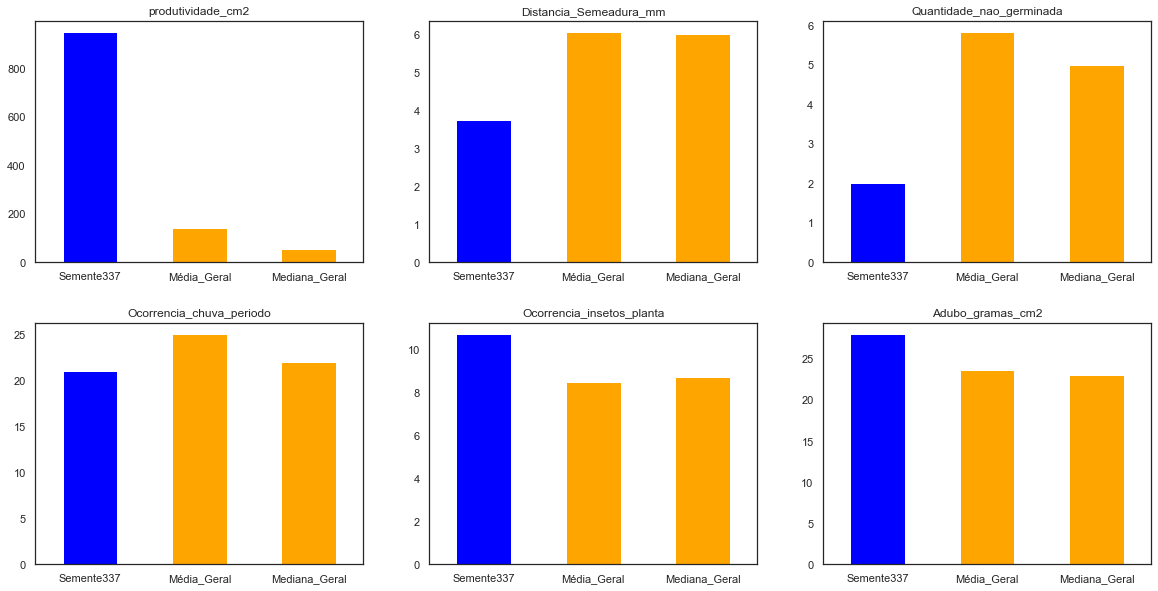

In [71]:
plt.figure(figsize=(20, 10))
for i, feature in enumerate(df_337.columns[2:]):
    plt.subplot(2, 3, i + 1)
    plt.subplots_adjust(wspace = 0.2, hspace = 0.25)
    df_337[feature].plot.bar(rot=0, color=['blue', 'orange', 'orange'])
    plt.title(feature)

## Considerações Finais

Dada a falta de informação a respeito das variáveis o resultado pode ter inconsistências na interpretação.

A variável "Situação" não demonstra por si o seu sentido. Desta forma, optei por não excluí-la, uma vez que pode representar algo relevante para a qualidade da semente.

Testes realizados com a sua exclusão levaram a uma nova configuração de clusters, onde predomina a separação entre sementes que passaram pela geada e as que não passaram e subdivisões mais focadas na produtividade e quantidade plantada.  

Apesar de todo o estudo apresentado, a inexistência de teste da mesma espécie em diversos cenários impossibilita uma recomendação precisa. 